In [1]:
import seispy.utils.responses as rsps
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from seispy.station import StationArray
from scipy.linalg import pinv, svd
from seispy import plot as hplot
from seispy.station import homestake, spiral
from seispy.station.stationdata import SeismometerArray

In [2]:
duration=1000
freq=1
velocity=5700
amplitude=1
nside=16
# stations=spiral(50, radius=5000, n_per_turn=20)
stations=homestake(origin='TPK')
data = SeismometerArray.initialize_all_good(stations, duration, chans_type='fast_chans')
data.add_p_wave(amplitude, np.radians(30), np.radians(60), freq, duration, c=velocity)
# data.add_white_noise(1)

In [3]:
Gp, junk = data.get_gamma_matrix_healpy('p', stations, velocity, freq, nside=nside, autocorrelations=False)
G = Gp.T

In [4]:
Fisher = np.dot(G.T.conj(), G)
InvFisher = pinv(Fisher, cond=1e-15)

In [5]:
recovery = np.dot(InvFisher, np.dot(G.T.conj(), data.get_coherences(freq)))
sigma2 = np.dot(InvFisher, InvFisher.T.conj())

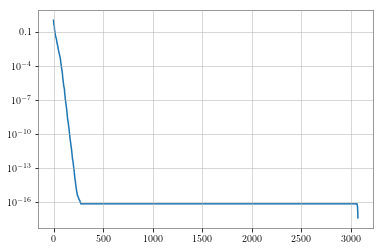

In [6]:
u, s, vh = svd(Fisher)
plt.plot(s/max(s))
plt.yscale('log')
plt.show()

/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (65) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (109) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (112) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph m

/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (121) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))


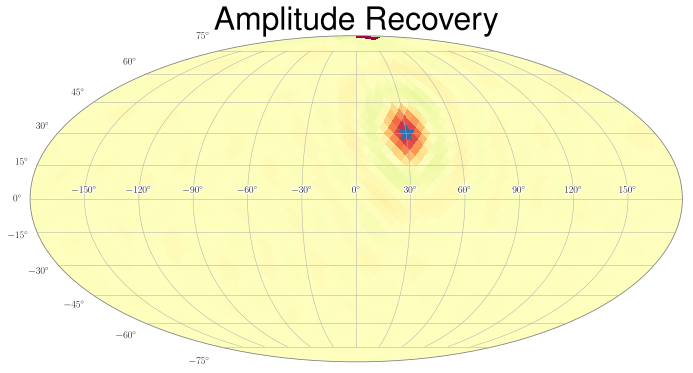

In [7]:
recmax = np.abs(np.real(recovery)).max()
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
hplot.healpix_heatmap(np.real(recovery), cmap='RdBu_r', vmin=-recmax, vmax=recmax)
plt.title("Amplitude Recovery", fontsize=32)
hplot.outline_text(ax)
ax.scatter(np.radians(30), np.radians(30), marker='*', s=256, color='C0')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

In [8]:
print(np.sum(np.real(recovery)))

0.25101130711846054


/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (115) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (105) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (103) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph 

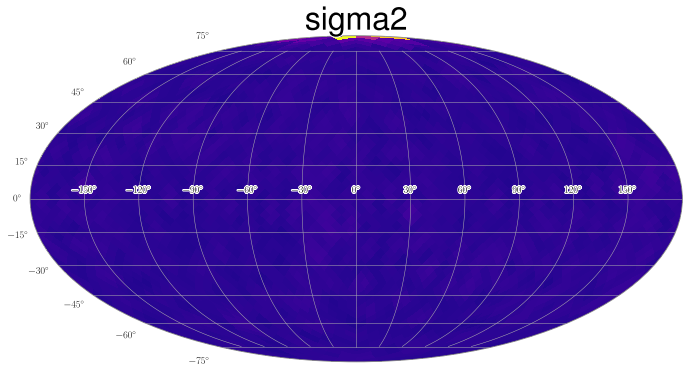

In [9]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
hplot.healpix_heatmap(np.sqrt(np.diag(np.abs(sigma2))), cmap='plasma', vmin=0, vmax=np.sqrt(np.abs(sigma2)).max())
# plt.colorbar()
plt.title("sigma2", fontsize=32)
hplot.outline_text(ax)
# ax.scatter(np.radians(45), 0, marker='*', s=256, color='C1')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (83) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (78) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (82) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may

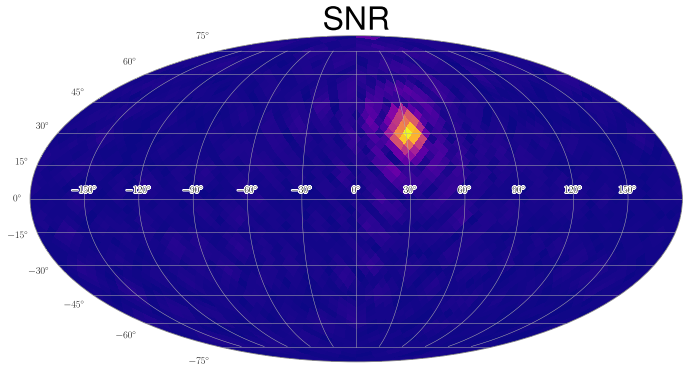

In [10]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
SNR = np.abs(recovery) / np.sqrt(np.diag(np.abs(sigma2)))
hplot.healpix_heatmap(SNR, cmap='plasma', vmin=0, vmax=SNR.max())
# plt.colorbar()
plt.title("SNR", fontsize=32)
hplot.outline_text(ax)
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()

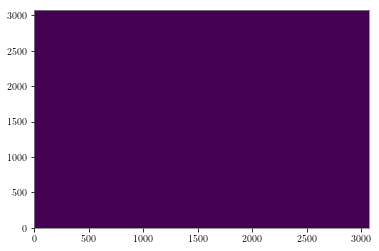

In [11]:
import matplotlib
matplotlib.rc('text', usetex=True)
plt.pcolormesh(np.abs(sigma2))
plt.show()

In [12]:
MRM = np.dot(InvFisher, Fisher)
print(MRM.shape)

(3072, 3072)


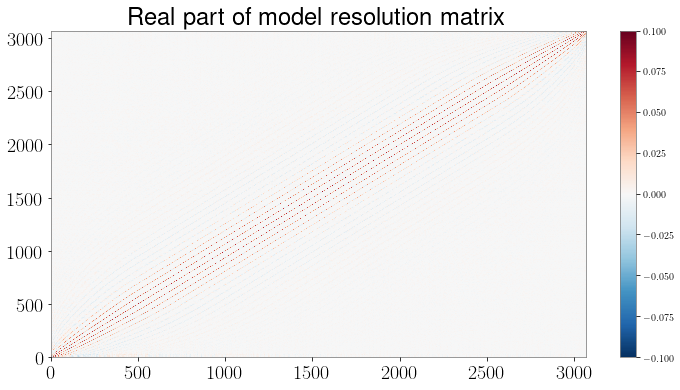

[1.00009918 0.01791191 0.04130602 ... 0.07666397 0.07792282
 0.07781601]


In [21]:
plt.figure(figsize=(12,6))
plt.pcolormesh(np.real(MRM), cmap='RdBu_r',
               vmin=-.1,
               vmax=.1)
plt.colorbar()
ax = plt.gca()
ax.tick_params(labelsize=20)
plt.title('Real part of model resolution matrix', fontsize=24)
plt.show()
print(np.diag(MRM.real))

/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (67) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (111) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (108) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph m

/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (115) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (119) of font (/usr/local/texlive/2018/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/Users/pmeyers/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (105) of font 

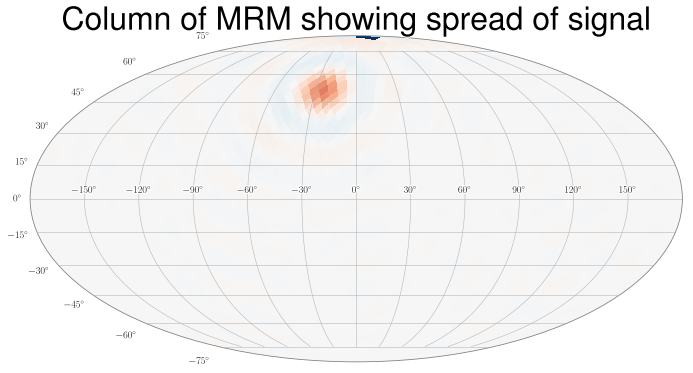

In [22]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
hplot.healpix_heatmap(np.real(MRM[:, 360]), cmap='RdBu_r', vmin=-np.abs(np.real(MRM[:, 360])).max(), vmax=np.abs(np.real(MRM[:, 360])).max())
# plt.colorbar()
plt.title("Column of MRM showing spread of signal", fontsize=32)
hplot.outline_text(ax)
# ax.scatter(np.radians(45), 0, marker='*', s=256, color='C1')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()